In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [5]:
customers.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2022-04-16
freq,1,1,59,3


In [16]:
customers.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [7]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB


In [8]:
products.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [17]:
products.isnull().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [9]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [11]:
transactions.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [18]:
transactions.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [12]:
data_combined = transactions.merge(customers, on='CustomerID', how='left').merge(products, on='ProductID', how='left')

In [13]:
data_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price_x          1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
 10  ProductName      1000 non-null   object 
 11  Category         1000 non-null   object 
 12  Price_y          1000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 101.7+ KB


In [14]:
data_combined.describe()

,Quantity,TotalValue,Price_x,Price_y
count,1000.000000,1000.000000,1000.00000,1000.00000
mean,2.537000,689.995560,272.55407,272.55407
std,1.117981,493.144478,140.73639,140.73639
min,1.000000,16.080000,16.08000,16.08000
25%,2.000000,295.295000,147.95000,147.95000
50%,3.000000,588.880000,299.93000,299.93000
75%,4.000000,1011.660000,404.40000,404.40000
max,4.000000,1991.040000,497.76000,497.76000


In [15]:
data_combined.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [19]:
data_combined.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64

In [20]:
products_not_in_transactions = products[~products['ProductID'].isin(transactions['ProductID'])]
print(products_not_in_transactions)

Empty DataFrame
Columns: [ProductID, ProductName, Category, Price]
Index: []


In [21]:
customers_not_in_transactions = customers[~customers['CustomerID'].isin(transactions['CustomerID'])]
print(customers_not_in_transactions)

    CustomerID   CustomerName Region  SignupDate
179      C0180  Amy Carpenter   Asia  2023-10-25


In [23]:
unique_customers_count = transactions['CustomerID'].nunique()
unique_customers_count

199

In [24]:
unique_products_count = transactions['ProductID'].nunique()
unique_products_count

100

In [29]:
product_sales_count = data_combined.groupby(['ProductID', 'ProductName','Price_y'])['Quantity'].sum().reset_index()
product_sales_count.rename(columns={'Quantity': 'TotalQuantitySold'}, inplace=True)
product_sales_count.sort_values('TotalQuantitySold', ascending=False, inplace=True)
print(product_sales_count)

   ProductID               ProductName  Price_y  TotalQuantitySold
53      P054        SoundWave Cookbook    57.30                 46
58      P059           SoundWave Jeans   303.20                 46
28      P029        TechPro Headphones   433.64                 45
47      P048          TechPro Cookbook   416.40                 43
56      P057     ActiveWear Smartphone   239.70                 43
..       ...                       ...      ...                ...
43      P044  ActiveWear Running Shoes    18.82                 13
59      P060         HomeSense T-Shirt   155.65                 13
23      P024        SoundWave Cookbook   338.66                 12
98      P099    SoundWave Mystery Book   354.29                 11
30      P031      SoundWave Headphones   196.40                  9

[100 rows x 4 columns]


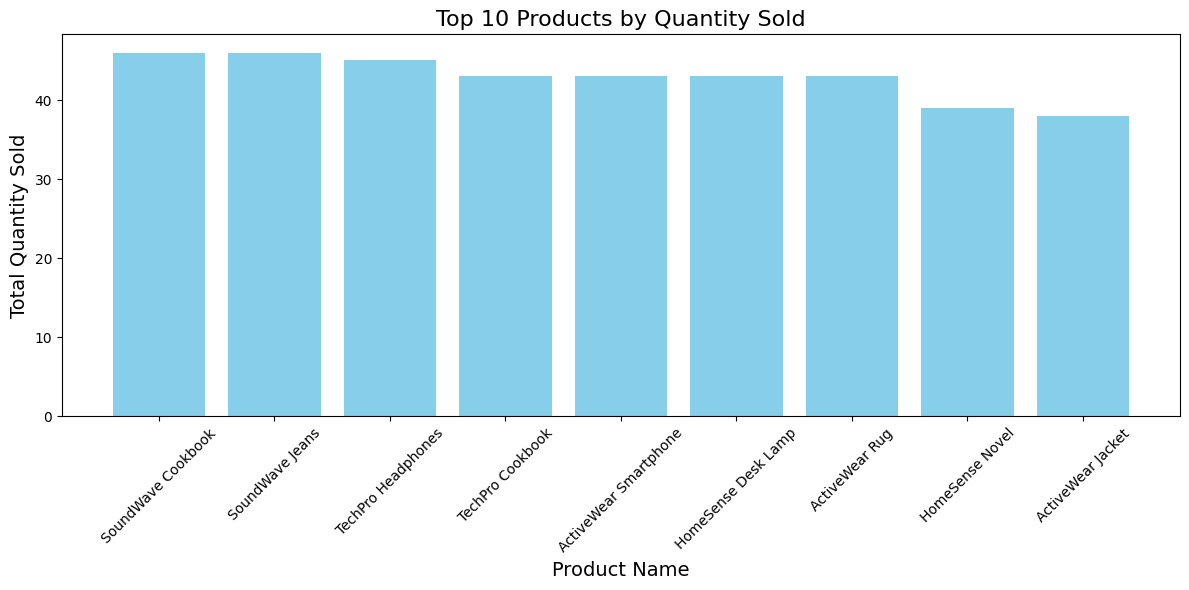

In [31]:
top_10_products = product_sales_count.head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_products['ProductName'], top_10_products['TotalQuantitySold'], color='skyblue')
plt.xlabel('Product Name', fontsize=14)
plt.ylabel('Total Quantity Sold', fontsize=14)
plt.title('Top 10 Products by Quantity Sold', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [32]:
top_10_products

,ProductID,ProductName,Price_y,TotalQuantitySold
53,P054,SoundWave Cookbook,57.30,46
58,P059,SoundWave Jeans,303.20,46
28,P029,TechPro Headphones,433.64,45
47,P048,TechPro Cookbook,416.40,43
56,P057,ActiveWear Smartphone,239.70,43
60,P061,HomeSense Desk Lamp,156.96,43
78,P079,ActiveWear Rug,417.37,43
61,P062,HomeSense Novel,374.16,39
19,P020,ActiveWear Jacket,396.34,38
27,P028,HomeSense Desk Lamp,235.58,38


In [33]:
category_sales_count = data_combined.groupby('Category')['Quantity'].sum().reset_index()
category_sales_count = category_sales_count.rename(columns={'Quantity': 'TotalQuantitySold'})
category_sales_count

,Category,TotalQuantitySold
0,Books,681
1,Clothing,590
2,Electronics,627
3,Home Decor,639


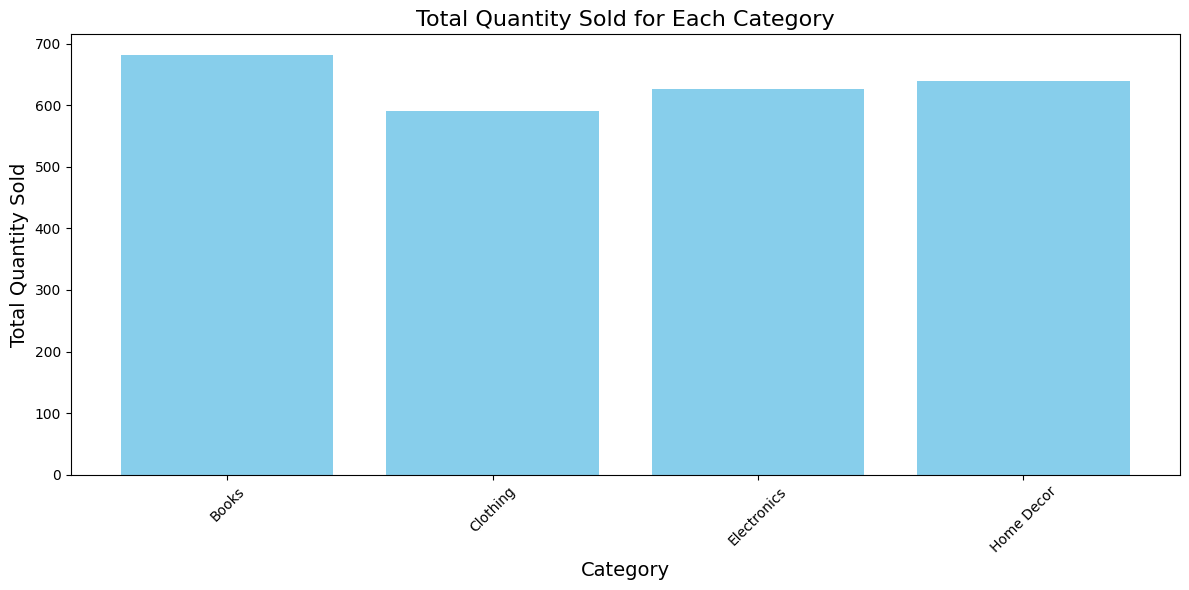

In [38]:
plt.figure(figsize=(12, 6))
plt.bar(category_sales_count['Category'], category_sales_count['TotalQuantitySold'], color='skyblue')
plt.xlabel('Category', fontsize=14)
plt.ylabel('Total Quantity Sold', fontsize=14)
plt.title('Total Quantity Sold for Each Category', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [39]:
category_sales_count = data_combined.groupby(['Category', 'Region'])['Quantity'].sum().reset_index()
category_sales_count = category_sales_count.rename(columns={'Quantity': 'TotalQuantitySold'})
category_sales_count

,Category,Region,TotalQuantitySold
0,Books,Asia,120
1,Books,Europe,165
2,Books,North America,155
3,Books,South America,241
4,Clothing,Asia,166
5,Clothing,Europe,119
6,Clothing,North America,147
7,Clothing,South America,158
8,Electronics,Asia,132
9,Electronics,Europe,144


In [40]:
revenue_by_region = data_combined.groupby('Region')['TotalValue'].sum()
revenue_by_region

Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64

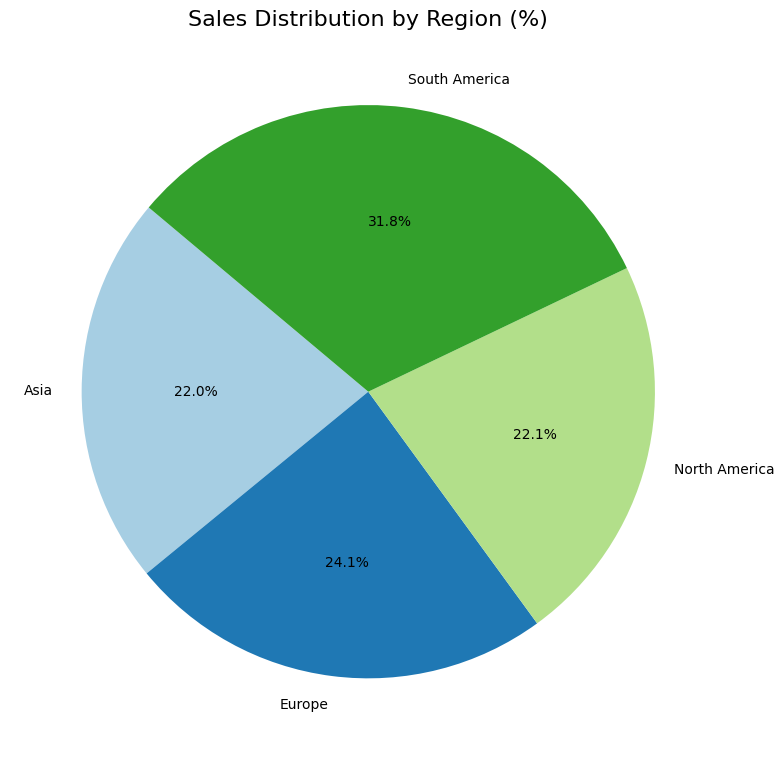

In [41]:
region_percentages = revenue_by_region / revenue_by_region.sum() * 100

plt.figure(figsize=(8, 8))
plt.pie(
    region_percentages, 
    labels=region_percentages.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.Paired.colors
)
plt.title('Sales Distribution by Region (%)', fontsize=16)
plt.tight_layout()
plt.show()

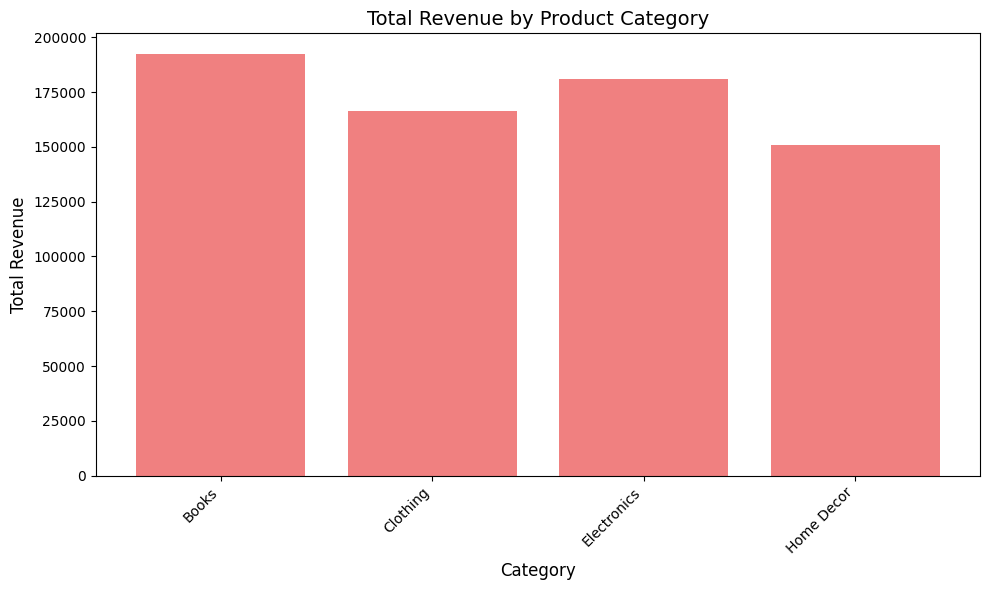

In [66]:
data_combined['TransactionDate'] = pd.to_datetime(data_combined['TransactionDate'])

category_revenue = data_combined.groupby('Category').agg(
    total_revenue=('TotalValue', 'sum')
).reset_index()

plt.figure(figsize=(10, 6))
plt.bar(category_revenue['Category'], category_revenue['total_revenue'], color='lightcoral')

plt.title('Total Revenue by Product Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [67]:
category_revenue

,Category,total_revenue
0,Books,192147.47
1,Clothing,166170.66
2,Electronics,180783.50
3,Home Decor,150893.93


In [44]:
revenue_by_customer = data_combined.groupby(['CustomerID', 'CustomerName','Region'])['TotalValue'].sum()

In [45]:
top_10_customers = revenue_by_customer.sort_values(ascending=False).head(10)
top_10_customers = top_10_customers.reset_index()
top_10_customers

,CustomerID,CustomerName,Region,TotalValue
0,C0141,Paul Parsons,Europe,10673.87
1,C0054,Bruce Rhodes,Asia,8040.39
2,C0065,Gerald Hines,North America,7663.70
3,C0156,William Adams,North America,7634.45
4,C0082,Aimee Taylor,South America,7572.91
5,C0188,Anna Ball,South America,7111.32
6,C0059,Mrs. Kimberly Wright,North America,7073.28
7,C0028,Jennifer Pena,Asia,6819.57
8,C0099,Rodney Eaton,South America,6715.72
9,C0165,Juan Mcdaniel,South America,6708.10


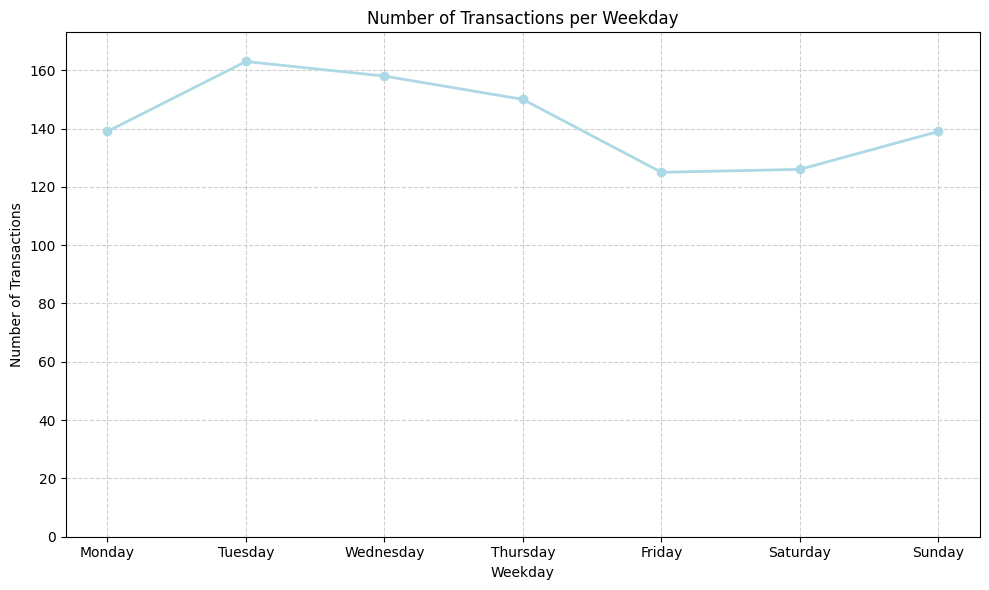

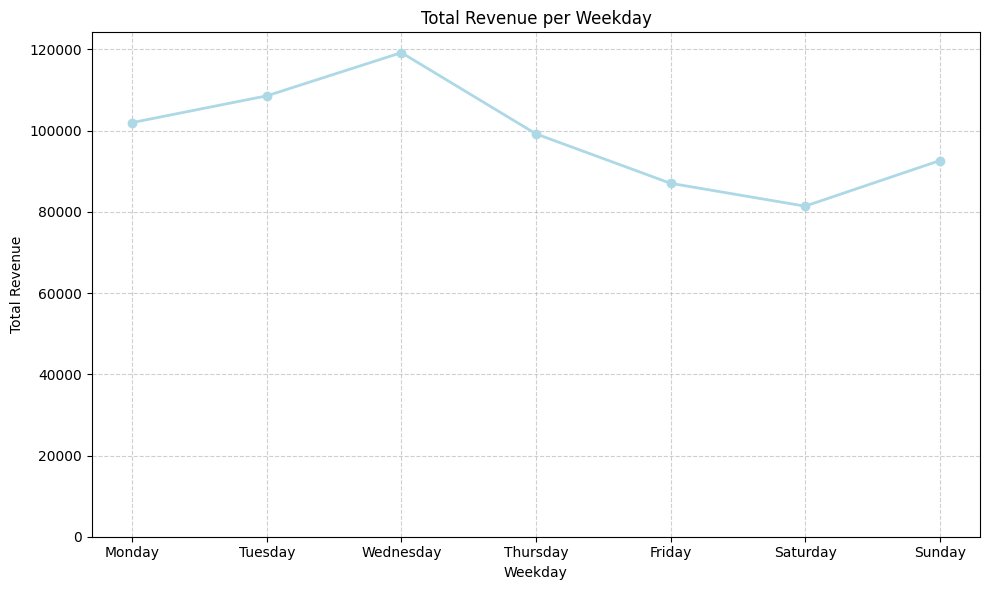

In [54]:
data_combined['TransactionDate'] = pd.to_datetime(data_combined['TransactionDate'])
data_combined['Weekday'] = data_combined['TransactionDate'].dt.dayofweek

weekday_sales = data_combined.groupby('Weekday').agg(
    num_transactions=('TransactionID', 'count'),
    total_revenue=('TotalValue', 'sum')
).reset_index()

plt.figure(figsize=(10, 6))
plt.plot(weekday_sales['Weekday'], weekday_sales['num_transactions'], marker='o', color='lightblue', linewidth=2)
plt.title('Number of Transactions per Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Transactions')
plt.xticks(weekday_sales['Weekday'], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.ylim(0, weekday_sales['num_transactions'].max() + 10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(weekday_sales['Weekday'], weekday_sales['total_revenue'], marker='o', color='lightblue', linewidth=2)
plt.title('Total Revenue per Weekday')
plt.xlabel('Weekday')
plt.ylabel('Total Revenue')
plt.xticks(weekday_sales['Weekday'], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.ylim(0, weekday_sales['total_revenue'].max() + 5000)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [55]:
weekday_sales

,Weekday,num_transactions,total_revenue
0,0,139,101984.33
1,1,163,108567.61
2,2,158,119203.15
3,3,150,99202.71
4,4,125,87032.09
5,5,126,81399.74
6,6,139,92605.93


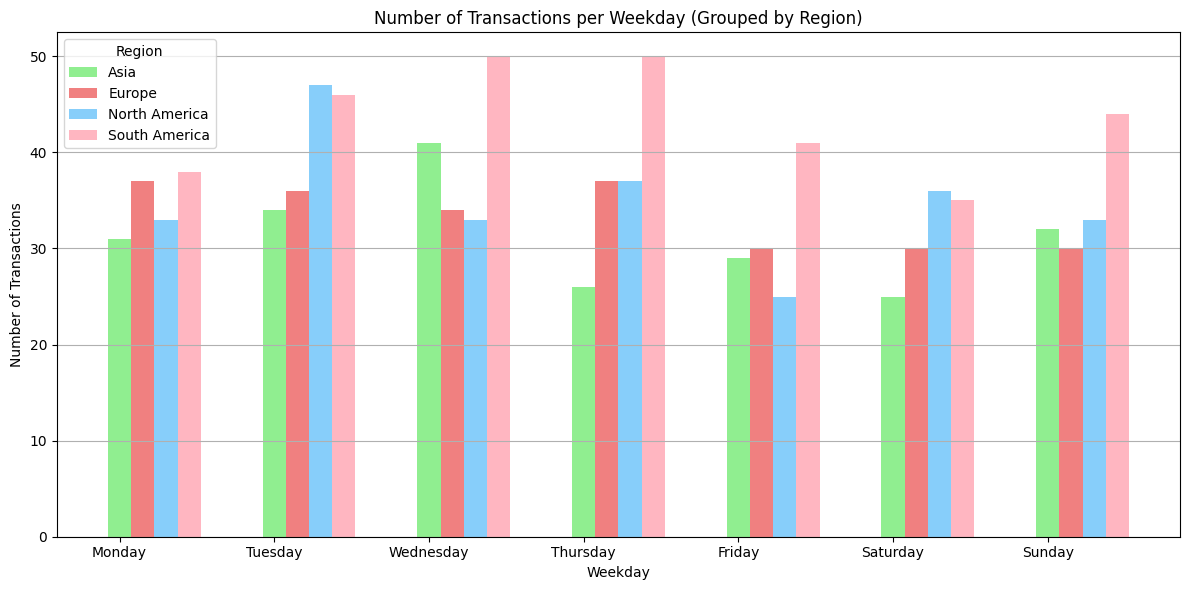

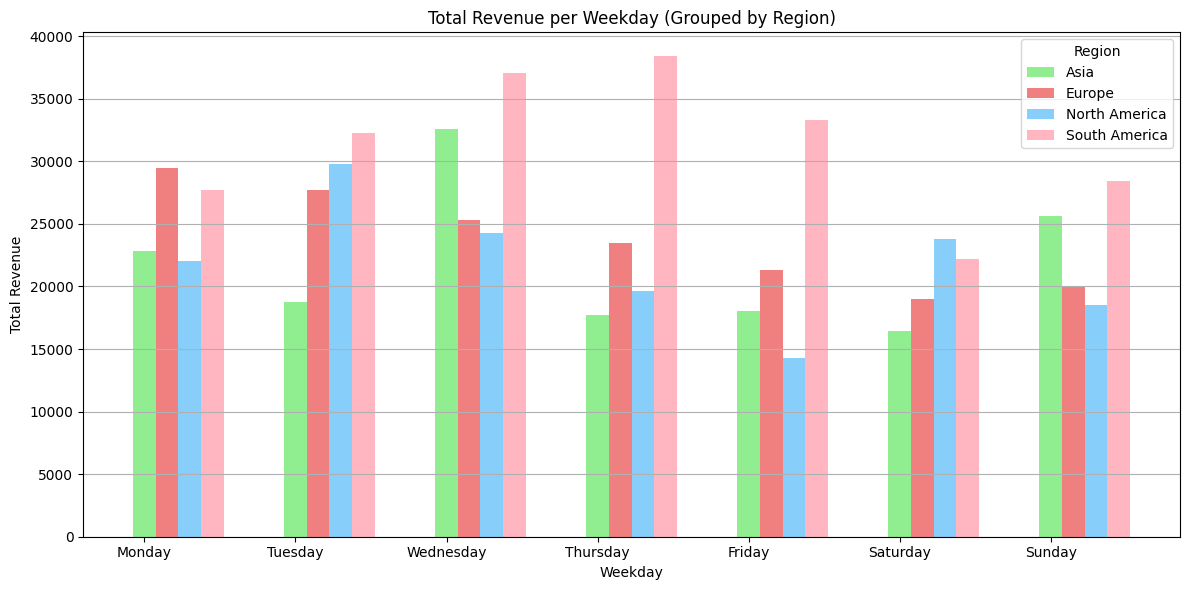

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

data_combined['TransactionDate'] = pd.to_datetime(data_combined['TransactionDate'])
data_combined['Weekday'] = data_combined['TransactionDate'].dt.dayofweek

weekday_region_sales = data_combined.groupby(['Weekday', 'Region']).agg(
    num_transactions=('TransactionID', 'count'),
    total_revenue=('TotalValue', 'sum')
).reset_index()

bar_width = 0.15

plt.figure(figsize=(12, 6))
regions = weekday_region_sales['Region'].unique()
light_colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink', 'lightyellow']

for idx, region in enumerate(regions):
    region_data = weekday_region_sales[weekday_region_sales['Region'] == region]
    plt.bar(region_data['Weekday'] + idx * bar_width, region_data['num_transactions'], 
            width=bar_width, label=region, color=light_colors[idx % len(light_colors)+1])

plt.title('Number of Transactions per Weekday (Grouped by Region)')
plt.xlabel('Weekday')
plt.ylabel('Number of Transactions')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.legend(title='Region')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
for idx, region in enumerate(regions):
    region_data = weekday_region_sales[weekday_region_sales['Region'] == region]
    plt.bar(region_data['Weekday'] + idx * bar_width, region_data['total_revenue'], 
            width=bar_width, label=region, color=light_colors[idx % len(light_colors)+1])

plt.title('Total Revenue per Weekday (Grouped by Region)')
plt.xlabel('Weekday')
plt.ylabel('Total Revenue')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.legend(title='Region')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


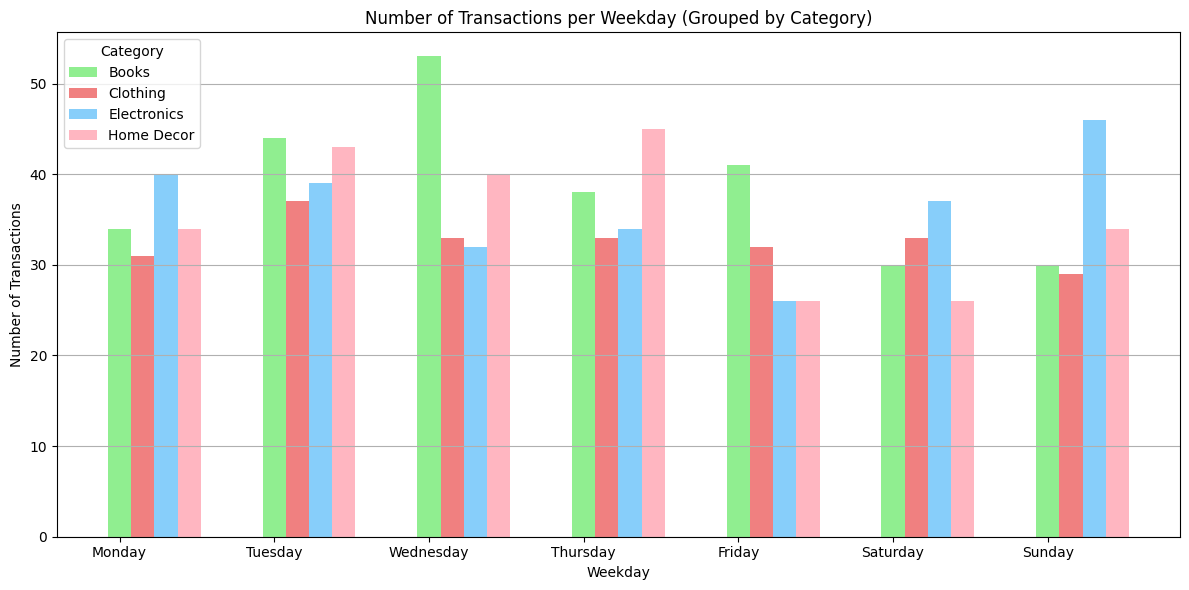

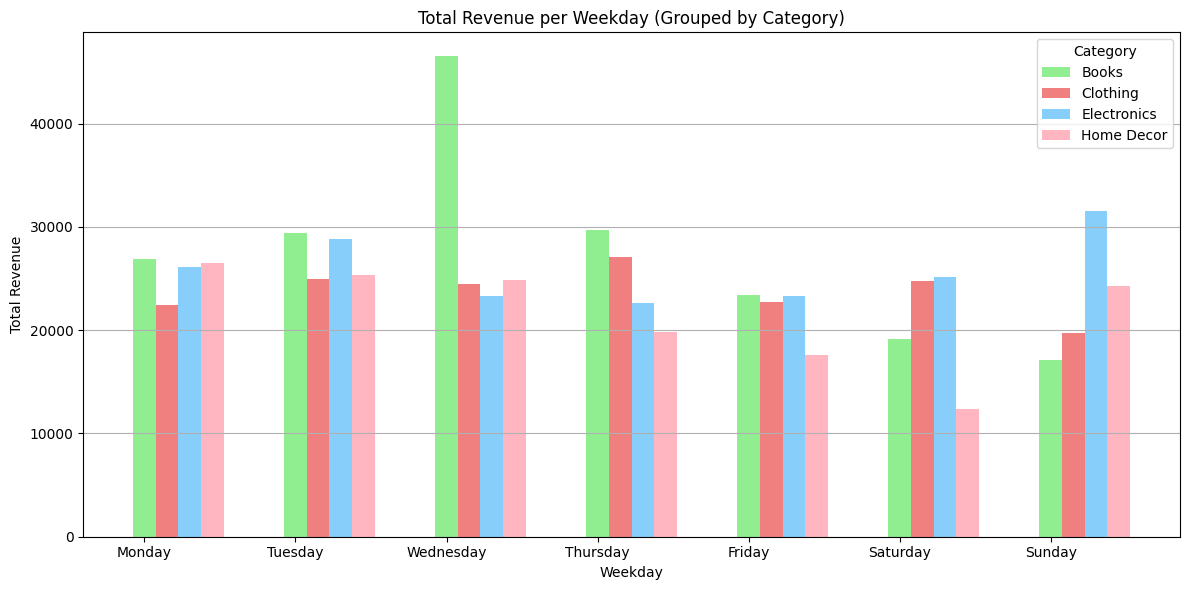

In [62]:
data_combined['TransactionDate'] = pd.to_datetime(data_combined['TransactionDate'])
data_combined['Weekday'] = data_combined['TransactionDate'].dt.dayofweek

weekday_category_sales = data_combined.groupby(['Weekday', 'Category']).agg(
    num_transactions=('TransactionID', 'count'),
    total_revenue=('TotalValue', 'sum')
).reset_index()

bar_width = 0.15

plt.figure(figsize=(12, 6))
categories = weekday_category_sales['Category'].unique()
for idx, category in enumerate(categories):
    category_data = weekday_category_sales[weekday_category_sales['Category'] == category]
    plt.bar(category_data['Weekday'] + idx * bar_width, category_data['num_transactions'], 
            width=bar_width, label=category, color=light_colors[idx % len(light_colors)+1])
plt.title('Number of Transactions per Weekday (Grouped by Category)')
plt.xlabel('Weekday')
plt.ylabel('Number of Transactions')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.legend(title='Category')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
for idx, category in enumerate(categories):
    category_data = weekday_category_sales[weekday_category_sales['Category'] == category]
    plt.bar(category_data['Weekday'] + idx * bar_width, category_data['total_revenue'], 
            width=bar_width, label=category, color=light_colors[idx % len(light_colors)+1])
plt.title('Total Revenue per Weekday (Grouped by Category)')
plt.xlabel('Weekday')
plt.ylabel('Total Revenue')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.legend(title='Category')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


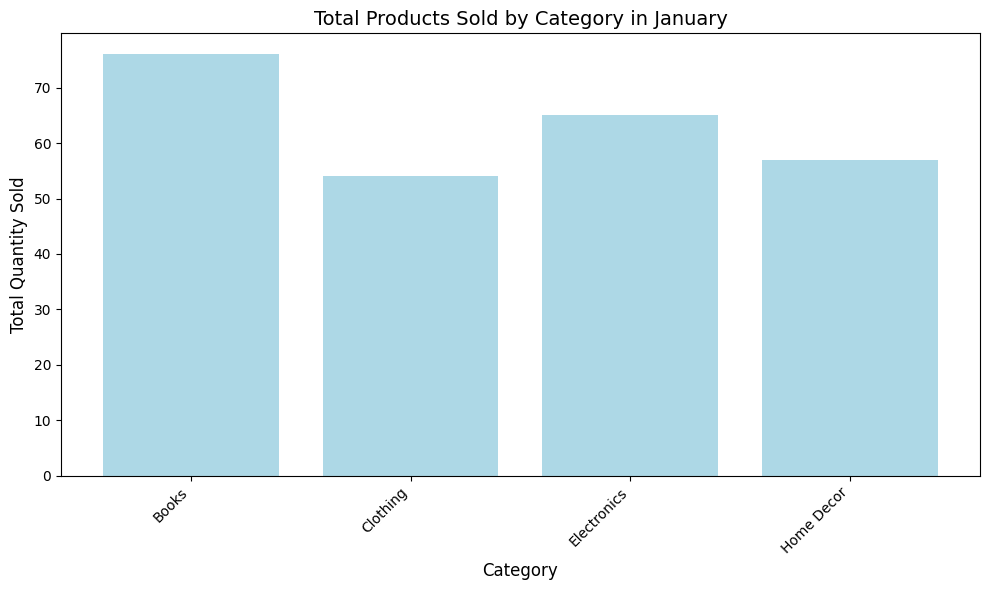

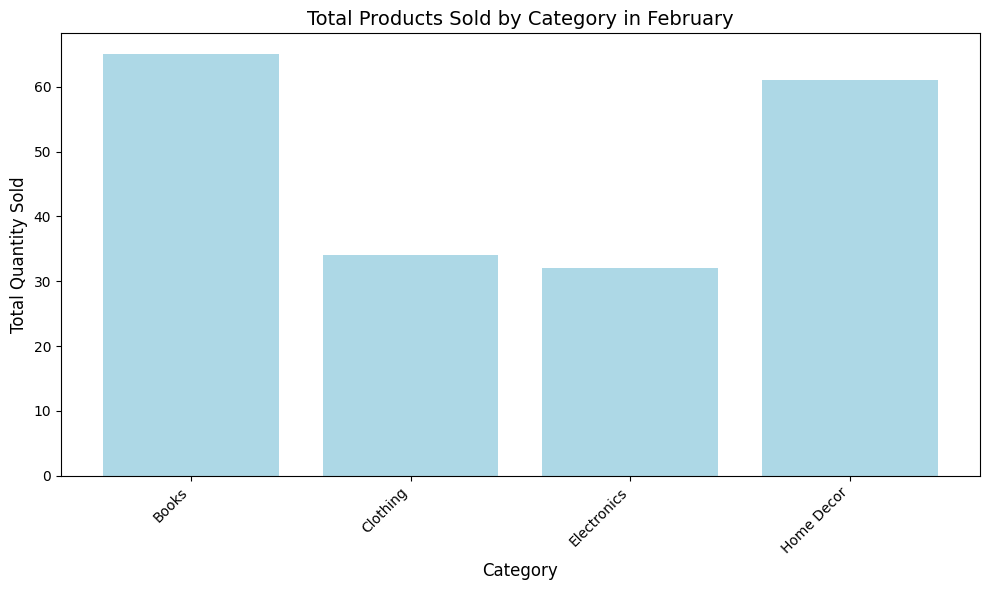

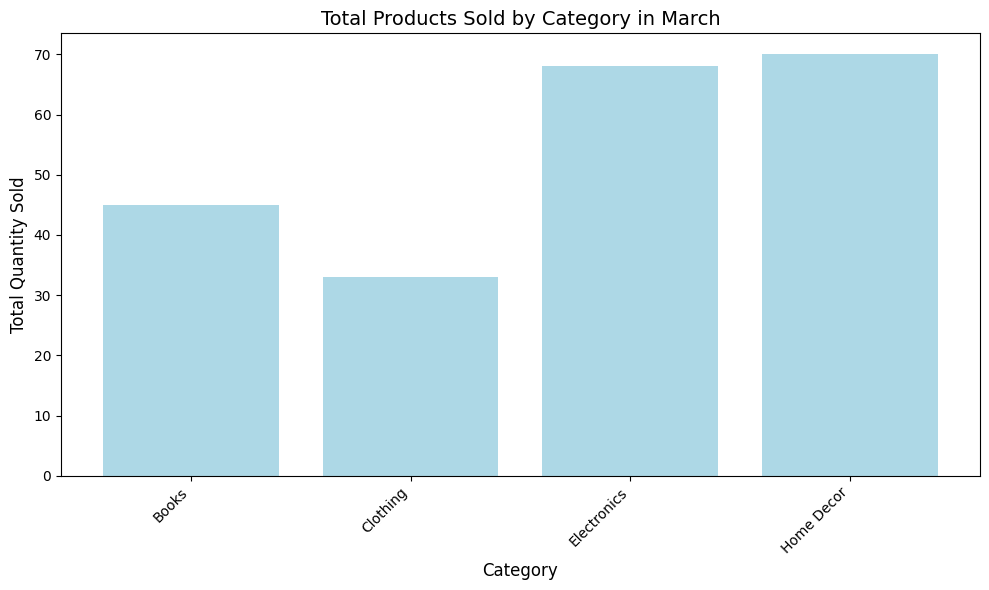

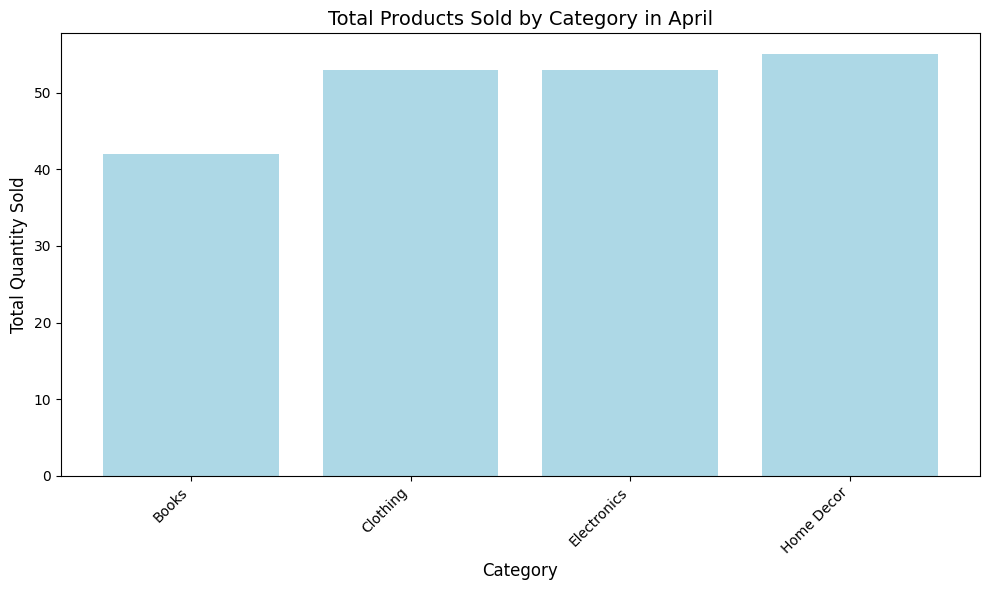

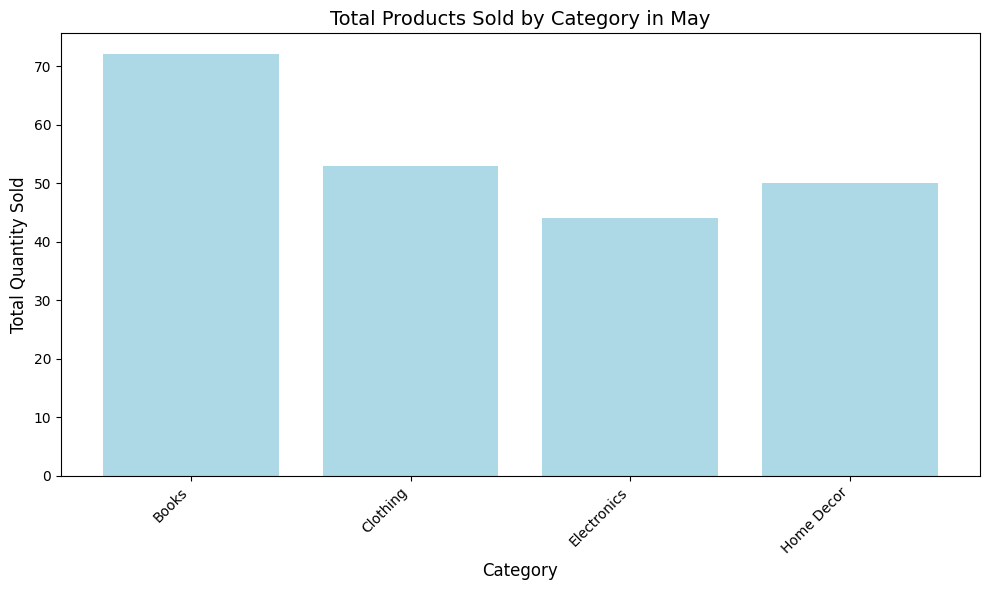

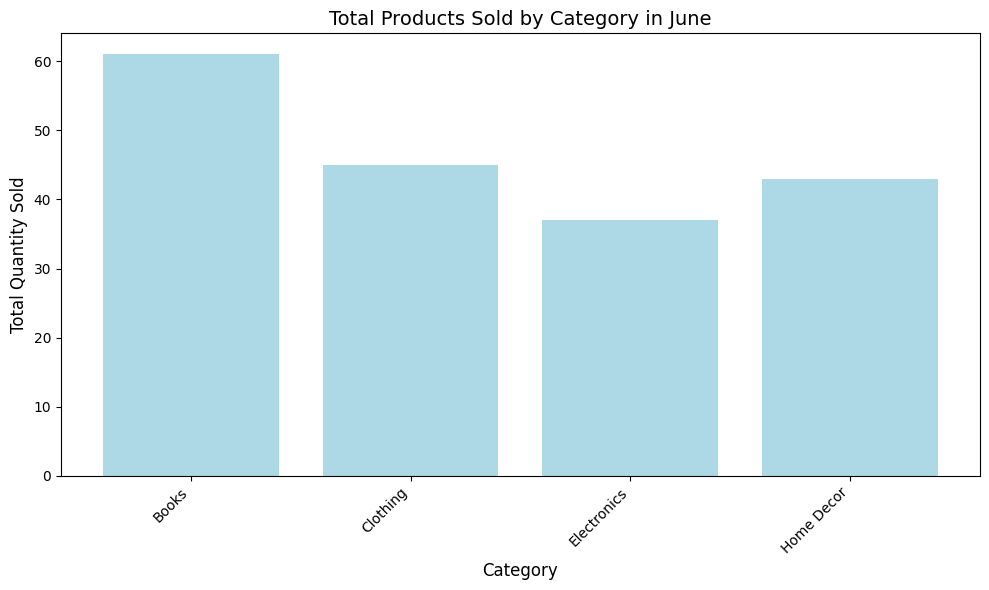

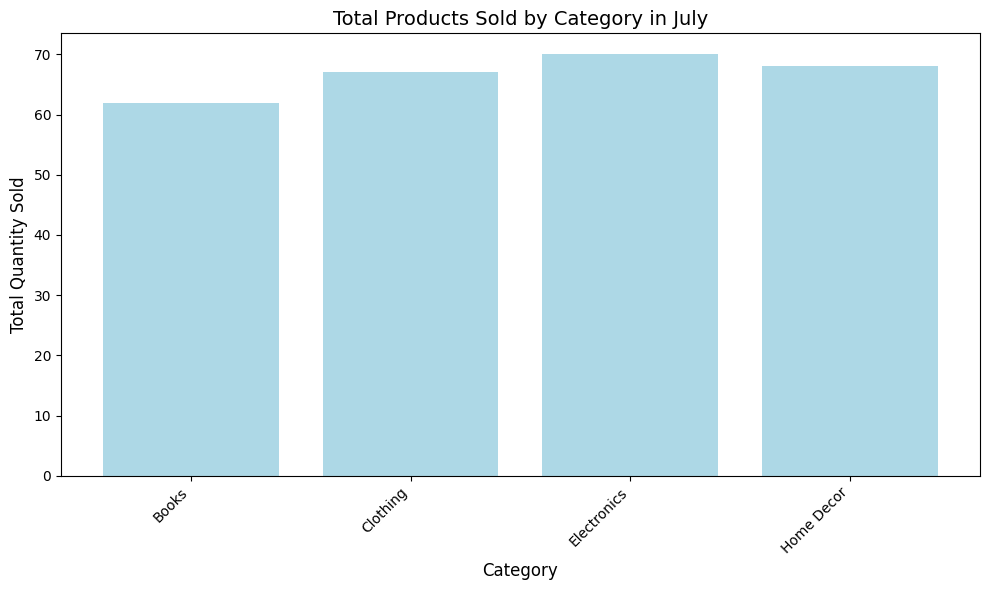

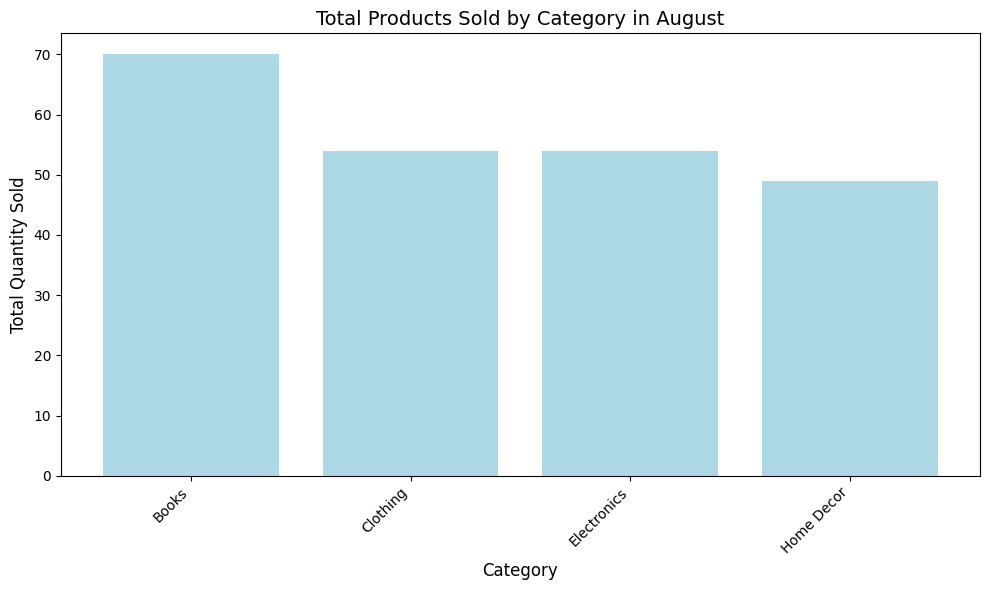

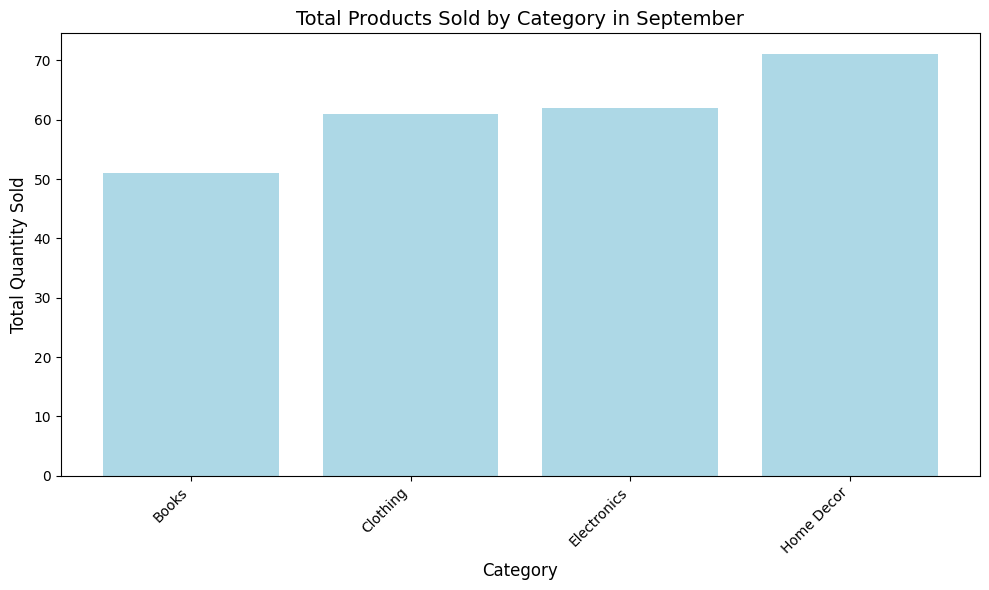

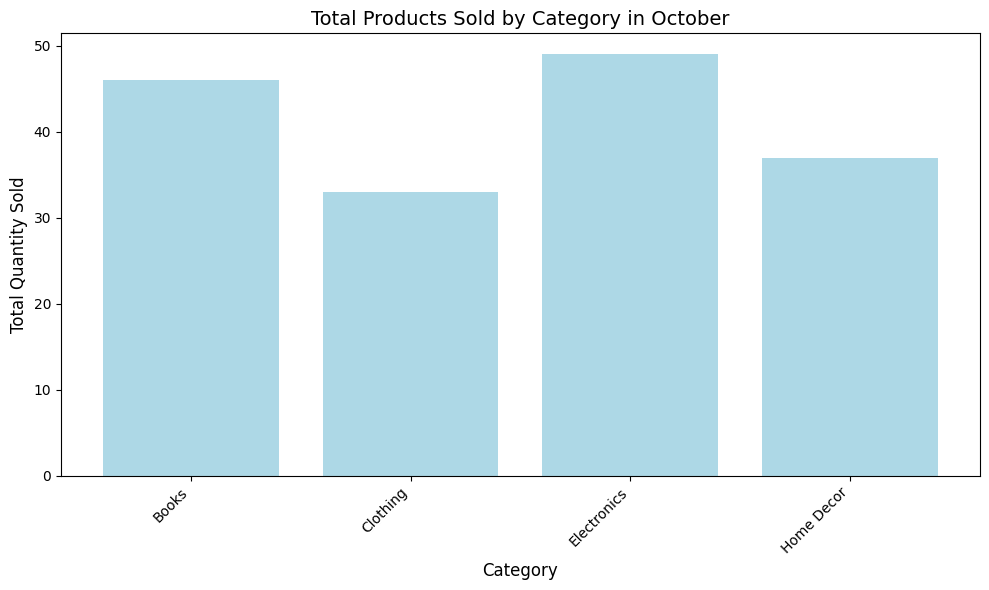

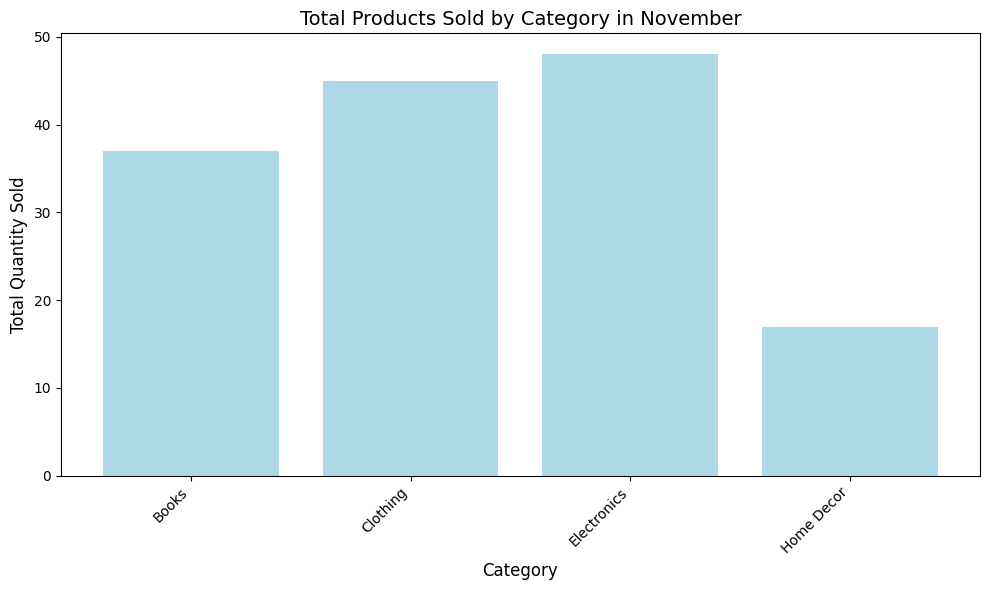

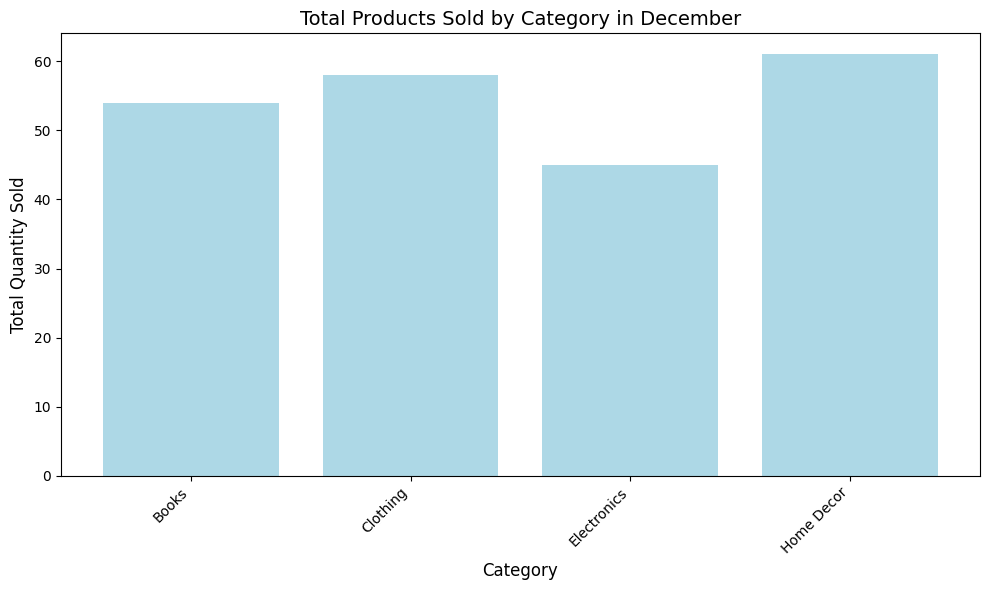

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

data_combined['TransactionDate'] = pd.to_datetime(data_combined['TransactionDate'])
data_combined['Month'] = data_combined['TransactionDate'].dt.month

category_sales_by_month = data_combined.groupby(['Month', 'Category']).agg(
    total_quantity_sold=('Quantity', 'sum')
).reset_index()

for month in range(1, 13):
    month_data = category_sales_by_month[category_sales_by_month['Month'] == month]
    
    plt.figure(figsize=(10, 6))
    plt.bar(month_data['Category'], month_data['total_quantity_sold'], color='lightblue')
    
    plt.title(f'Total Products Sold by Category in {["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"][month-1]}', fontsize=14)
    plt.xlabel('Category', fontsize=12)
    plt.ylabel('Total Quantity Sold', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
